# Scrapbook

This notebook contains some examples of TimeAtlas usage

## Define a TimeSeries

The two essential components are a Pandas Series and a DatetimeIndex

In [1]:
from timeatlas import TimeSeries
from pandas import Series, DatetimeIndex
import pandas as pd

s = pd.read_csv("../src/timeatlas/data/dummy-bbdata/13336.csv")
s = Series(data=s["value"].values, index=pd.to_datetime(s["timestamp"]).values)
s = s["2019-09-01":"2019-09-25"]

In [2]:
ts = TimeSeries(s)

In [3]:
ts.boundaries()

(Timestamp('2019-09-01 00:00:19'), Timestamp('2019-09-25 23:50:18'))

In [4]:
ts1 = TimeSeries(s)
ts2 = TimeSeries(s)

In [5]:
def add(x,y):
    return x + y

In [6]:
ts1.apply(add, ts2)

## Define a Metadata object

In [7]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}
my_coordinates = {
    "lat" : 46.796611,
    "lon" : 7.147563
}
my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coordinates
}

# Create the Metadata object
my_meta = Metadata(my_dict)


## Define a TimeSeries with Metadata

In [8]:
ts_meta = TimeSeries(s, my_meta)
ts_meta

## Make Predictions

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

In [9]:
from timeatlas import models

In [10]:
m1 = models.Prophet()
m1.fit(ts)
pts1 = m1.predict(ts)
pts2 = m1.predict("14 days")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
m2 = models.LinearRegression()
m2.fit(ts)
pts3 = m2.predict(ts)
pts4 = m2.predict("14 days")

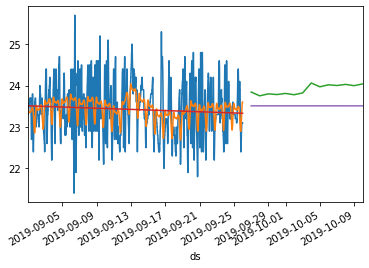

In [12]:
ts.plot()
pts1.plot()
pts2.plot()
pts3.plot()
pts4.plot()

## Detect Anomalies


In [13]:
from timeatlas import detectors, metrics

In [14]:
ts.apply(lambda x: x+1).series

2019-09-01 00:00:19    24.3
2019-09-01 00:10:13    24.3
2019-09-01 00:20:13    24.3
2019-09-01 00:30:13    24.3
2019-09-01 00:40:11    24.4
                       ... 
2019-09-25 23:10:13    24.1
2019-09-25 23:20:11    24.1
2019-09-25 23:30:13    24.1
2019-09-25 23:40:13    24.1
2019-09-25 23:50:18    24.1
Name: values, Length: 3595, dtype: float64

In [15]:
# Create the base of the detector. 
# i.e. this detector is based on this model and compute this error
d = detectors.Surprise()

# Fit the detector to a defined time series 
# - compute the re, re_norm
a = d.compute(m1, ts, metrics.relative_error)\
    .normalize("minmax")\
    .set_alerts("quantile", [0.85, 0.95])\
    .detect(ts)


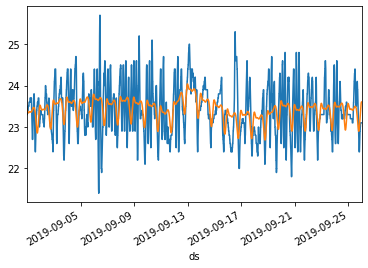

In [16]:
d.truth.plot()
d.prediction.plot()

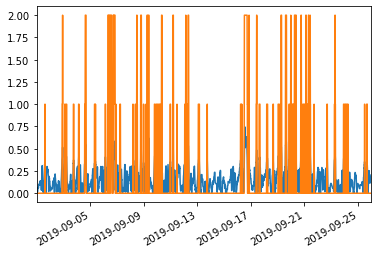

In [17]:
d.surprise.plot()
d.alerts.plot()

In [18]:
from timeatlas.processing import scalers

In [19]:
y = scalers.minmax(ts)

In [20]:
warning_percent = 0.85
warning_threshold = df_2["re_norm"].quantile(q=warning_percent)
critical_percent = 0.95
critical_threshold = df_2["re_norm"].quantile(q=critical_percent)
df_2["warn"] = df_2.apply(lambda x: warn(x.re_norm, warning_threshold, critical_threshold), axis=1)
df_2["warn_roll"] = df_2["warn"].rolling("120 min").max()

NameError: name 'df_2' is not defined

In [ ]:
err2 = d.compute_error(m2, ts1, err).set_alert(type='quantile', thresholds=[0.85, 0.95]).normalize("minmax").detect(ts2)
        

In [ ]:
s1 = pd.Series([1,2,3,4])

In [ ]:
s2 = pd.Series([5,6,7,8])

In [ ]:
df = pd.DataFrame(data = {"s1": s1, "s2": s2})

In [ ]:
def f(x, y):    
    return x + y 

In [ ]:
df.apply(lambda x: f(x.s1, x.s2), axis=1)

In [ ]:
ts2 = ts.apply(func, ts3)